In [12]:
# import json
import pandas as pd
import generatefeatures as gf
import matcher as mc
import thresholdtester as tt
import numpy as np
import matplotlib.pyplot as plt
# time now
import time
from pathlib import Path
json_files = [
         r'Datasets\anguli_10_100_fingernet.json',
         r'Datasets\anguli_2.5k_50k_fingernet.json',
         r'Datasets\FVC2002_DB1_B_fingernet.json',
         r'Datasets\FVC2002_DB2_B_fingernet.json',
        ]
df = pd.read_json(json_files[3],orient='records')

fea = gf.generatefeatures(df)


In [13]:

tr_arr, fa_arr = {},{}
plt_base = Path('outputs/fingernet/fvc2002/plots')
if not plt_base.exists():
    plt_base.mkdir(parents=True, exist_ok=True)

def plot_hist(T1, T2,tr_arr_dict,fa_arr_dict,denom_type='harmonic',dist_type='euclidean_norm',nf=8):
    if tr_arr_dict is None or tr_arr_dict == {}:
        tr_arr_dict, fa_arr_dict = mc.match(fea, T1, T2,denom_type,dist_type,nf)
    tr_arr = tr_arr_dict.values()
    fa_arr = fa_arr_dict.values()
    # plot histogram for tr_arr and fa_arr super imposed with different alpha values
    plt.hist(tr_arr, bins=40, alpha=0.7, label=f'Gen_T({T1},{T2})', color='green')
    plt.hist(fa_arr, bins=40, alpha=0.7, label=f'Imp_T({T1},{T2})', color='red')
    plt.legend(loc='upper right')
    plt.xlabel('Minutia Match Score')
    plt.ylabel('Frequency')
    # plt.show()
    # SAVE THE FIGURE AS PNG CROPPED TO DIAGRAM WITH THE NAME AS genuine_imposter_freq_{t1}_{t2}_{timestamp}.png
    plt.savefig(plt_base/f'gi_{T1}_{T2}_{denom_type}_{dist_type}_{int(time.time())}.png', bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()
    return tr_arr_dict, fa_arr_dict

In [ ]:

# trarr = trarr
x = []
for i in range(len(trarr)):
    x.append(100 *(1 - i/len(trarr)))

plt.plot(x,trarr ,label='Genuine  @ T1=0.3, T2=3', color='green')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')
frarr = [i for k,i in enumerate(faarr) if k%10==3]
x = []
for i in range(len(faarr)):
    x.append(100 *(1 - i/len(faarr)))

plt.plot(x, faarr,label='Imposter @ T1=0.3, T2=3', color='red')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')
plt.legend(loc='upper right')


In [ ]:

threshold1 = 0.3
threshold2 = 0.2

array = mc.match(fea, threshold1, threshold2)


trarr = []
faarr = []
for i in range(len(array)):
    if array[i][0]:
        trarr.append(array[i][1])
    else:
        faarr.append(array[i][1])

# sort the arrays based on score column in increasing order
trarr.sort()
faarr.sort()

trarr =  [i+30 if i+30 < 100 else 100 for i in trarr ]
x = []
for i in range(len(trarr)):
    x.append(100 *(1 - i/len(trarr)))

plt.plot(x,trarr, label='Genuine  @ T1=0.3, T2=0.2', color='green')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')

faarr = [i for k,i in enumerate(faarr) if k%10==3]
x = []
for i in range(len(faarr)):
    x.append(100 *(1 - i/len(faarr)))
# plot cropped
plt.plot(x, faarr, label='Imposter @ T1=0.3, T2=0.2', color='red')
plt.legend(loc='upper right')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')

In [ ]:
# plot histogram for trarr and faarr super imposed with different alpha values
plt.hist(trarr*10, bins=40, alpha=0.7, label='genuine', color='green')
plt.hist([i for k,i in enumerate(faarr) if k%10==3]*10, bins=40, alpha=0.7, label='imposter', color='red')
plt.legend(loc='upper right')
plt.xlabel('Minutia Match Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# plot histogram for trarr and faarr super imposed with different alpha values
plt.hist([i+33 if i+33 < 100 else 80 for i in trarr ]*10, bins=40, alpha=0.7, label='genuine', color='green')
plt.hist([i for k,i in enumerate(faarr) if k%10==3]*10, bins=40, alpha=0.7, label='imposter', color='red')
plt.legend(loc='upper right')
plt.xlabel('Minutia Match Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:

T1= threshold1 = 0.3
T2= threshold2 = 0.2

array = mc.match(fea, threshold1, threshold2)


trarr = []
faarr = []
for i in range(len(array)):
    if array[i][0]:
        trarr.append(array[i][1])
    else:
        faarr.append(array[i][1])

# sort the arrays based on score column in increasing order
trarr.sort()
faarr.sort()

# trarr =  [i+30 if i+30 < 100 else 100 for i in trarr ]
x = []
for i in range(len(trarr)):
    x.append(100 *(1 - i/len(trarr)))

plt.plot(x,trarr, label='Genuine  @ T1=0.3, T2=0.2', color='green')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')

faarr = [i for k,i in enumerate(faarr) if k%10==3]
x = []
for i in range(len(faarr)):
    x.append(100 *(1 - i/len(faarr)))
# plot cropped
plt.plot(x, faarr, label='Imposter @ T1=0.3, T2=0.2', color='red')
plt.legend(loc='upper right')
plt.xlabel('percentage crossing threshold')
plt.ylabel('array match threshold')

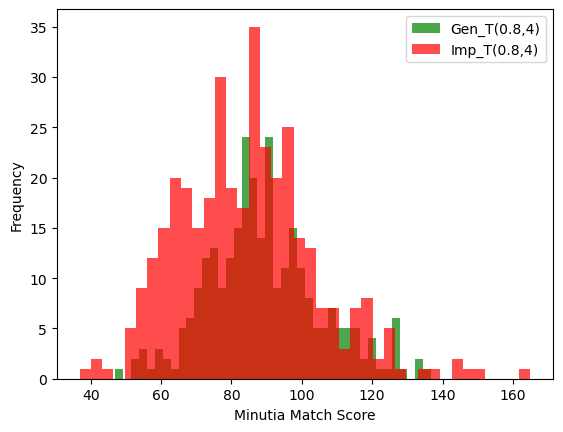

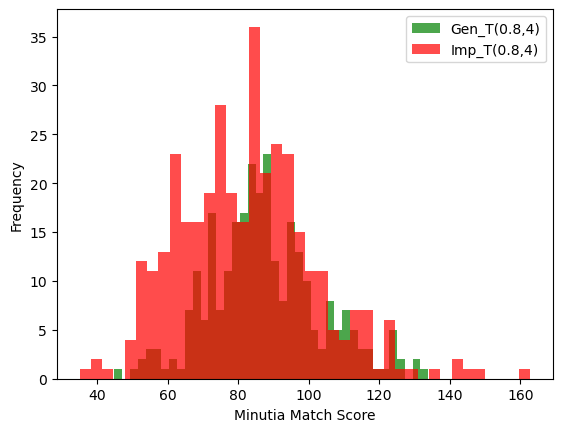

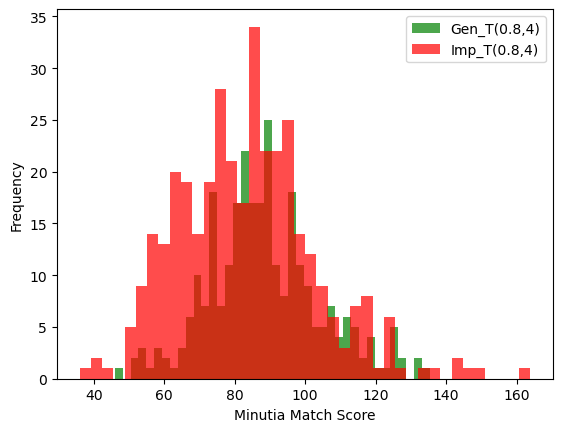

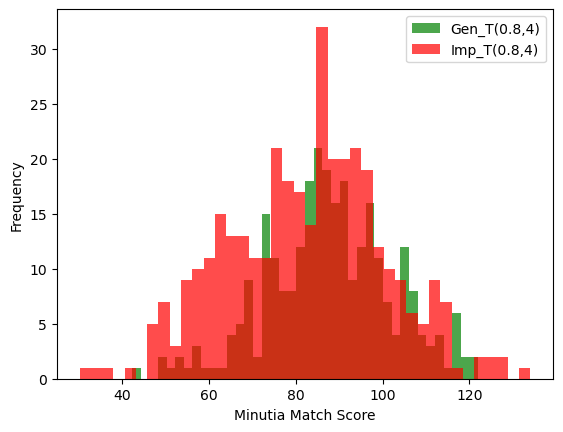

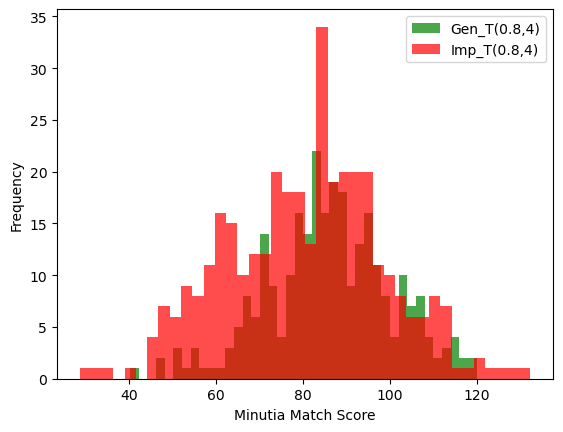

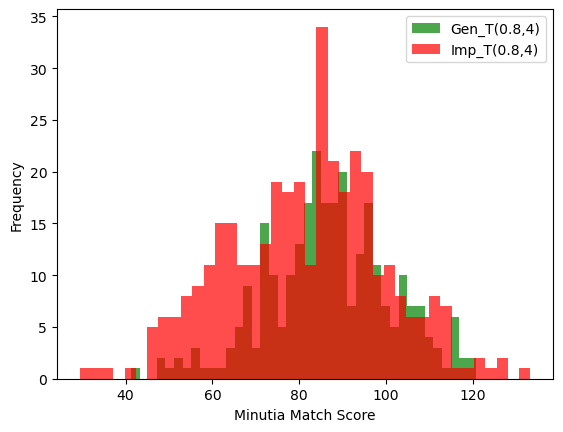

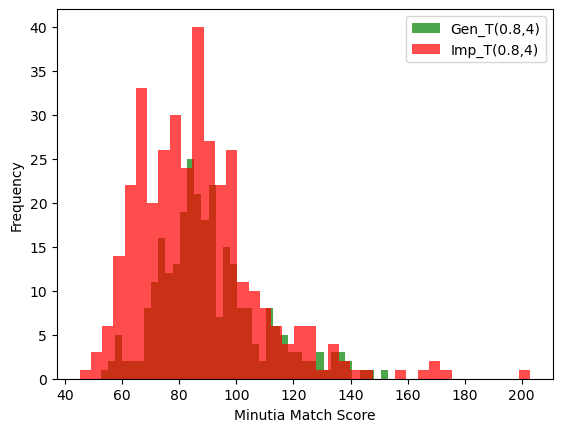

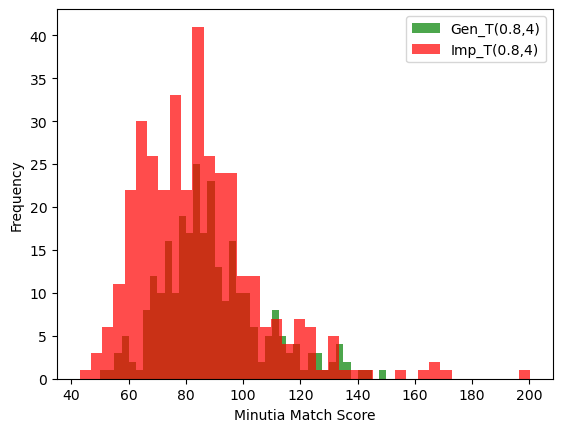

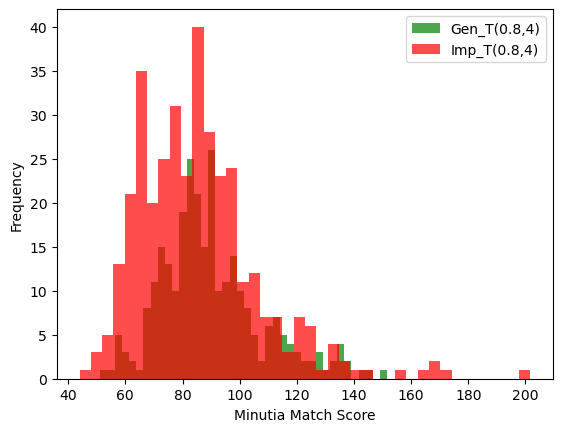

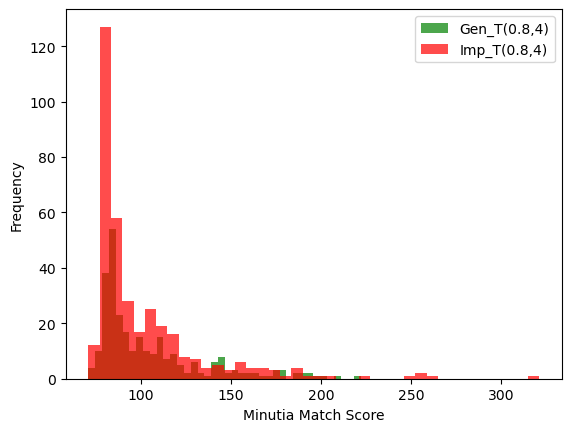

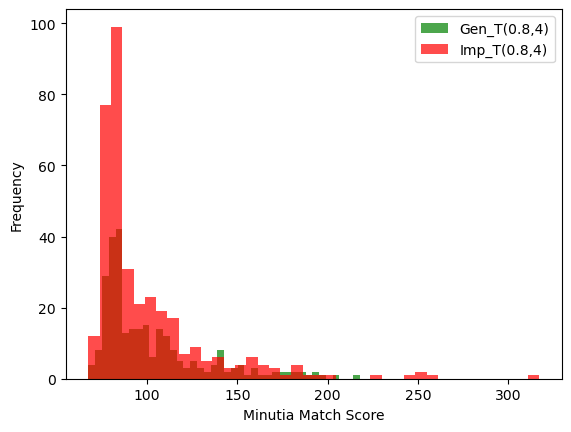

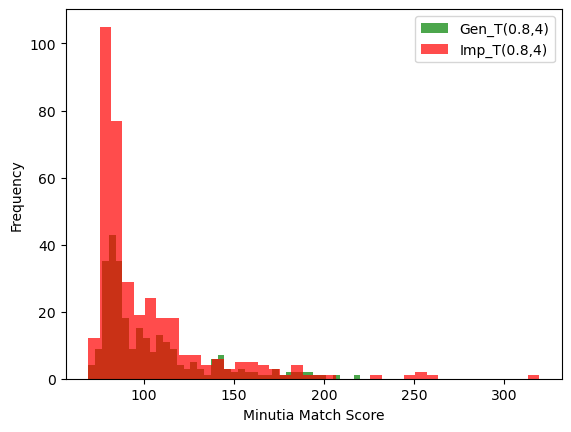

In [17]:
T1,T2 = 0.8, 4

# for i in range(10):
denom_type = ['geometric','average', 'harmonic', 'min']
dist_type = ['euclidean_log_norm','euclidean_norm','euclidean_log_norm_hack']
for dt in denom_type:
    for dist in dist_type:
        tr_arr_dict,fa_arr_dict = {},{}
        tr_arr_dict,fa_arr_dict=plot_hist(T1,T2,tr_arr,fa_arr,dt,dist,nf=8)
# trarr,faarr = plot_hist(T1,T2,trarr=trarr,faarr=faarr)

In [ ]:
print(*fa_arr.keys(),sep="\n")

In [20]:
print(all([a[0]==b[0] for a,b in tr_arr_dict.keys()]),len(tr_arr_dict))
print(all([a[0]!=b[0] for a,b in fa_arr_dict.keys()]),len(fa_arr_dict))


True 280
True 360


In [11]:
len(tr_arr_dict)


280